# <span style="color:red;"><center>TP - Quel temps fait-il ? </center></span>

***Comme le dit Confucius :"«  J'entends et j'oublie, Je vois et je me souviens, Je fais et je comprends. »"***

## 1. Objectif du TP

Certains site proposent d'accéder à des données métorologiques, le but de ce TP est d'en récupérer certaines afin de les afficher pour une ville donnée par exemple ...

## 2. Un site météo

Le site https://weatherstack.com par exemple donne accès aux données météo du jour au format *json*.

Ainsi, le lien suivant permet d'afficher les données pour Valbonne :

http://api.weatherstack.com/current?access_key=da06094db71ce04733f069fc758064df&query=Valbonne

Ce lien utilise ma clé API mais vous pouvez créer votre propre clé API sur le site de weatherstak en y créant un compte gratuit. (sign up free)


Dans l'onglet "Données brutes", en cliquant sur "Formater et indenter", on trouve en date du 08/12/2020, les données suivantes. On remarque que la structure est un **dictionnaire de dictionnaires**.
<pre>
{
  "request": {
    "type": "City",
    "query": "Valbonne, France",
    "language": "en",
    "unit": "m"
  },
  "location": {
    "name": "Valbonne",
    "country": "France",
    "region": "Provence-Alpes-Cote d'Azur",
    "lat": "43.633",
    "lon": "7.000",
    "timezone_id": "Europe/Paris",
    "localtime": "2020-12-08 17:48",
    "localtime_epoch": 1607449680,
    "utc_offset": "1.0"
  },
  "current": {
    "observation_time": "04:48 PM",
    "temperature": 9,
    "weather_code": 113,
    "weather_icons": [
      "https://assets.weatherstack.com/images/wsymbols01_png_64/wsymbol_0001_sunny.png"
    ],
    "weather_descriptions": [
      "Sunny"
    ],
    "wind_speed": 0,
    "wind_degree": 253,
    "wind_dir": "WSW",
    "pressure": 997,
    "precip": 0,
    "humidity": 76,
    "cloudcover": 0,
    "feelslike": 9,
    "uv_index": 3,
    "visibility": 10,
    "is_day": "yes"
  }
}
</pre>

## 3. Questions préliminaires

D'après la structure de données affichée précédemment :

* Quelles sont les clés du dictionnaire principal ?

* La clé "location" a pour valeur un dictionnaire qui contient combien de clés ?

* Donner l'instruction qui permet d'accéder à la température (en degré celsius) de la ville de Valbonne dans ce dernier bulletin.

**Répondre ici:**

* *Les clés du dictionnaire principal sont "request", "location" et "current".*

* *9 clés*

* `dictionnaire["current"]["temperature"]`

## 4. Ouvrir un fichier *json* en Python

En Python pour ouvrir un fichier *json* en ligne, on peut utiliser la bibliothèque *urllib3* et la bibliothèque *json*.

Si ces deux bibliothèques ne sont pas déjà installées, on peut les installer  avec les instructions `pip install urllib3` et `pip install json`.

**Par exemple, le programme ci-dessous charge dans un dictionnaire `reponse` les données récupérées sur le site de weatherstack.**

In [2]:
#import des bibliothèques
import urllib3
import json

# chargement du fichier
http = urllib3.PoolManager()
url_param="http://api.weatherstack.com/current?access_key=da06094db71ce04733f069fc758064df&query=Valbonne"
r = http.request('GET',url_param)
reponse=json.loads(r.data.decode('utf-8'))
# affichage de la réponse...
print(reponse)

{'request': {'type': 'City', 'query': 'Valbonne, France', 'language': 'en', 'unit': 'm'}, 'location': {'name': 'Valbonne', 'country': 'France', 'region': "Provence-Alpes-Cote d'Azur", 'lat': '43.633', 'lon': '7.000', 'timezone_id': 'Europe/Paris', 'localtime': '2020-12-14 23:52', 'localtime_epoch': 1607989920, 'utc_offset': '1.0'}, 'current': {'observation_time': '10:52 PM', 'temperature': 10, 'weather_code': 122, 'weather_icons': ['https://assets.weatherstack.com/images/wsymbols01_png_64/wsymbol_0004_black_low_cloud.png'], 'weather_descriptions': ['Overcast'], 'wind_speed': 9, 'wind_degree': 20, 'wind_dir': 'NNE', 'pressure': 1018, 'precip': 0, 'humidity': 94, 'cloudcover': 100, 'feelslike': 10, 'uv_index': 1, 'visibility': 10, 'is_day': 'no'}}


Le programme suivant permet d'afficher la date et l'heure à laquelle les données ont été générées :

In [3]:
#import des bibliothèques
import urllib3
import json

# chargement du fichier
http = urllib3.PoolManager()
url_param="http://api.weatherstack.com/current?access_key=da06094db71ce04733f069fc758064df&query=Valbonne"
r = http.request('GET',url_param)
reponse=json.loads(r.data.decode('utf-8'))
# affichage de la date
print("Date: " ,reponse["location"]["localtime"])

Date:  2020-12-14 23:52


## Tâche 1 :

Modifier le programme précédent afin que l'affichage donne ceci :
<pre>
Lieu:  Draguignan    Région:  Provence-Alpes-Cote d'Azur    Pays:  France
Date:  2019-08-05 16:26
temps:  Sunny
température:  33.0 °
Indice UV:  8.0
...autres infos ...
</pre>

In [10]:
#Écrire le code ici
print("Lieu:\t" +reponse["location"]["name"]+"\t Région:\t"+reponse["location"]["region"]+"\t Pays:\t"+reponse["location"]["country"])
print("Date: " ,reponse["location"]["localtime"])
print("Temps:\t",reponse["current"]["weather_descriptions"][0])
print("Température:\t",reponse["current"]["temperature"],"°")
print("Indice UV:\t",reponse["current"]["uv_index"])

Lieu:	Valbonne	 Région:	Provence-Alpes-Cote d'Azur	 Pays:	France
Date:  2020-12-14 23:52
Temps:	 Overcast
Température:	 10 °
Indice UV:	 1


## Afficher une icône météo :

Dans les données fournies, on remarque la présence d'une image, sous forme de lien, avec la clé `"weather_icons"`. Il s'agit en fait d'une icône qui indique le temps global. On peut récupérer et afficher cette icône grâce au module `urllib.request` et à la bibliothèque `pillow` pour les images.

Ainsi, le programme suivant, permet d'afficher cette icône récupérée sur le site *weatherstack*:

**Remarque : Dans la variable url_param, la dernière partie à été remplacée par une variable `ville`, ce qui permet de changer de ville plus facilement.**

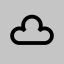

In [15]:
# import des bibliothèques
import urllib3
import json
import urllib.request
from PIL import Image
# chargement du fichier json
http = urllib3.PoolManager()
ville="valbonne"
url_param="http://api.weatherstack.com/current?access_key=da06094db71ce04733f069fc758064df&query="+ville
r = http.request('GET',url_param)
reponse=json.loads(r.data.decode('utf-8'))

# récupération de l'url de l'image
url_image=reponse["current"]["weather_icons"][0]
#print(url_image)
#chargement de l'image
image = Image.open(urllib.request.urlopen(url_image))
#affichage de l'image
display(image)

## Tâche 2 :

**Écrire une fonction qui reçoit en paramètre le nom d'une ville entrée par l'utilisateur et qui affiche un maximum de données météos pour cette ville en retour.**

Quelle est la ville dont vous souhaitez connaître la météo ? Toulouse


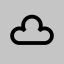

Lieu:	Toulouse	 Région:	Midi-Pyrenees	 Pays:	France
Date:  2020-12-15 00:10
Temps:	 Partly cloudy
Température:	 8 °
Indice UV:	 1


In [18]:
#Écrire le code ici
def meteo(ville):
    url_param="http://api.weatherstack.com/current?access_key=da06094db71ce04733f069fc758064df&query="+ville
    r = http.request('GET',url_param)
    reponse=json.loads(r.data.decode('utf-8'))

# récupération de l'url de l'image
    url_image=reponse["current"]["weather_icons"][0]
#chargement de l'image
    image = Image.open(urllib.request.urlopen(url_image))
#affichage de l'image
    display(image)
    print("Lieu:\t" +reponse["location"]["name"]+"\t Région:\t"+reponse["location"]["region"]+"\t Pays:\t"+reponse["location"]["country"])
    print("Date: " ,reponse["location"]["localtime"])
    print("Temps:\t",reponse["current"]["weather_descriptions"][0])
    print("Température:\t",reponse["current"]["temperature"],"°")
    print("Indice UV:\t",reponse["current"]["uv_index"])
    ...
ville=input("Quelle est la ville dont vous souhaitez connaître la météo ? ")
meteo(ville)